<a href="https://colab.research.google.com/github/lydiakatsis/zsl-acoustic-monitoring-scripts/blob/main/batch_run_CityNET_googledrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Run CityNet classifier on GoogleDrive folder** 

code from https://github.com/mdfirman/CityNet 

# CityNet - a neural network for urban sounds

CityNet is a machine-learned system for estimating the level of **biotic** and **anthropogenic** sound at each moment in time in an audio file.

The system has been trained and validated on human-labelled audio files captured from green spaces around London.

CityNet comprises a neural network classifier, which operates on audio spectrograms to produce a measure of biotic or anthropogenic activity level.

More details of the method are available from the paper:

> **[CityNet - Deep Learning Tools for Urban Ecoacoustic Assessment](https://doi.org/10.1101/248708)**
>
> Alison J Fairbrass, Michael Firman, Carol Williams, Gabriel J Brostow, Helena Titheridge and Kate E Jones
>
> **doi**: https://doi.org/10.1101/248708


## How to classify a new audio file with CityNet

- Run `python demo.py` to classify an example audio file.
- Predictions should be saved in the folder `demo`.
- Your newly-created file `demo/prediction.pdf` should look identical to the provided file `demo/reference_prediction.pdf`:

## How to classify multiple audio files

You can run CityNet on a folder of audio files with:

```bash
python multi_predict.py path/to/audio/files
```

This will save summaries of what is found in each wav file found to `prediction_summaries.csv`.


# Clone the repo

In [ ]:
!git clone https://github.com/mdfirman/CityNet.git

**Install packages**

In [ ]:
!pip install tf_slim
!pip install -U PyYAML
!pip install librosa

# Mount GoogleDrive
For instructions using Teams or GoogleBucket go here.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load model**

Running through the scripit demo.py both loads the model and checks everything is installed properly.

In [ ]:
cd CityNet

In [ ]:
!python demo.py

# Run predictions on folder

In [7]:
folder = "/content/drive/MyDrive/ZSL/Network Rail project/trial_data"  

In [ ]:
!python /content/CityNet/multi_predict.py "$folder"

# Plot results

In [ ]:
import pandas as pd
prediction_summaries = pd.read_csv('prediction_summaries.csv')

In [ ]:
prediction_summaries

,Filename,Average biotic sound,Average anthropogenic sound
0,20220223_140841.WAV,0.266,0.949
1,20220223_150000.WAV,0.407,0.980
2,20220223_160000.WAV,0.429,0.984
3,20220223_170000.WAV,0.550,0.984
4,20220223_180000.WAV,0.342,0.987
5,20220223_190000.WAV,0.283,0.981
6,20220223_200000.WAV,0.271,0.985
7,20220223_210000.WAV,0.229,0.981
8,20220223_220000.WAV,0.240,0.981
9,20220223_230000.WAV,0.207,0.982


In [ ]:
# Plot average per hour for site
def fname_to_time(fname):
    return fname.split('_')[-1][:4]

def date(fname):
    return fname.split('_')[0]

In [ ]:
prediction_summaries['hour'] = [fname.split('_')[-1][:2] for fname in prediction_summaries['Filename']]
prediction_summaries['date'] = [fname.split('_')[0] for fname in prediction_summaries['Filename']]


([<matplotlib.axis.YTick at 0x7f984f5cbf90>,
 <a list of 2 Text major ticklabel objects>)

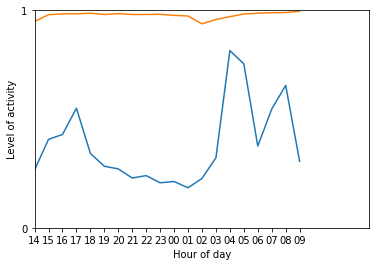

In [ ]:
import matplotlib.pyplot as plt
plt.plot(prediction_summaries['hour'] , prediction_summaries['Average biotic sound'] )
plt.plot(prediction_summaries['hour'] , prediction_summaries['Average anthropogenic sound'] )
plt.xlabel('Hour of day')
plt.ylabel('Level of activity')
plt.xlim(0, 24)
plt.ylim(0, 1)
#plt.xticks([0, 6, 12, 18, 24], ['00:00', '06:00', '12:00', '18:00', '24:00'])
#plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
plt.yticks([0, 1.0])
